In [22]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import soundfile as sf

In [23]:
audio_file = "gwtwd.wav"
y, sr = librosa.load(audio_file)

In [24]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_delta = librosa.feature.delta(mfccs)  
mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

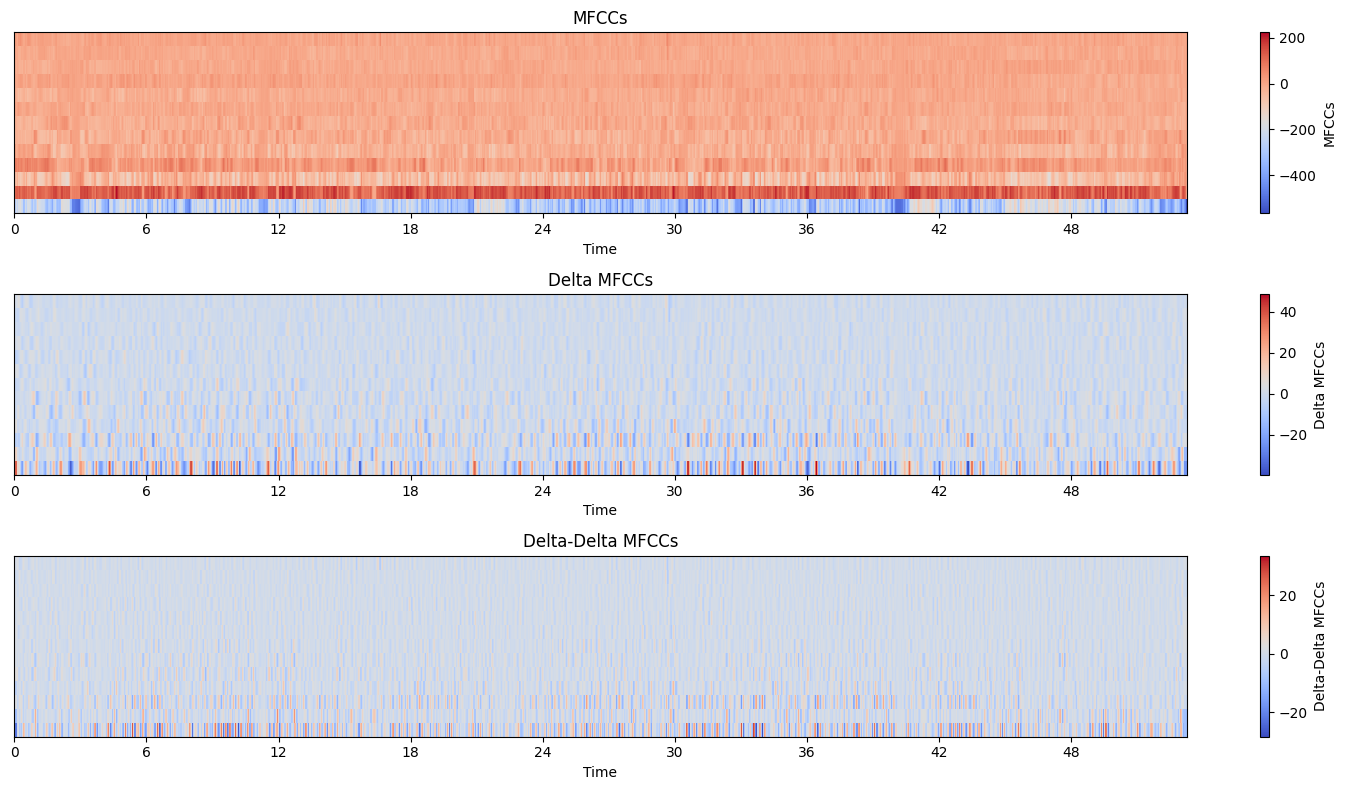

In [25]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(label='MFCCs')
plt.title('MFCCs')

plt.subplot(3, 1, 2)
librosa.display.specshow(mfccs_delta, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(label='Delta MFCCs')
plt.title('Delta MFCCs')

plt.subplot(3, 1, 3)
librosa.display.specshow(mfccs_delta2, x_axis='time', sr=sr, cmap='coolwarm')
plt.colorbar(label='Delta-Delta MFCCs')
plt.title('Delta-Delta MFCCs')

plt.tight_layout()
plt.show()

In [26]:
scaler = StandardScaler()
mfccs = mfccs.T 
mfccs_scaled = scaler.fit_transform(mfccs)

In [27]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11) 

In [28]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(mfccs_scaled)
    inertia.append(kmeans.inertia_)
    
    if n_clusters > 1:
        score = silhouette_score(mfccs_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

/home/ankur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ankur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ankur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ankur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

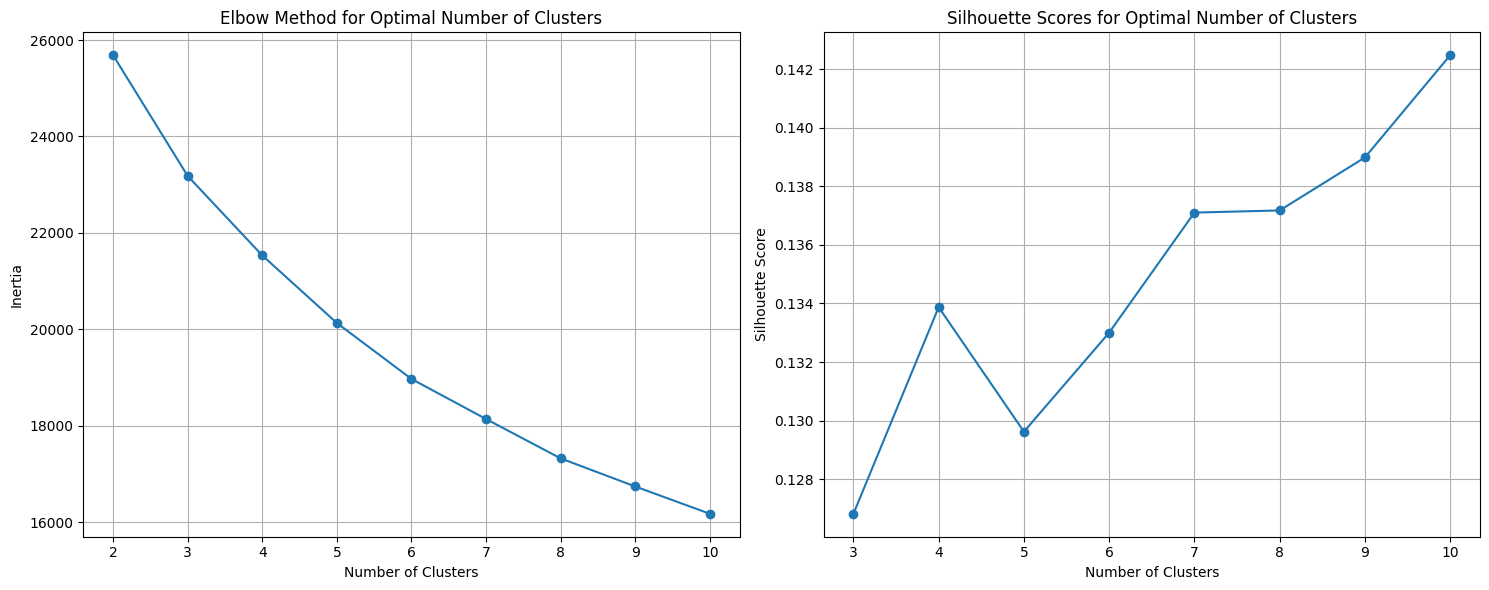

In [29]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(cluster_range[1:], silhouette_scores[1:], marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range[1:])
plt.grid()

plt.tight_layout()
plt.show()

In [30]:
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

In [31]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(mfccs_scaled)

/home/ankur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
for cluster in range(optimal_clusters):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_audio = []
    hop_length = 512
    
    for idx in cluster_indices:
        start_sample = idx * hop_length
        end_sample = (idx + 1) * hop_length
        cluster_audio.append(y[start_sample:end_sample])
    
    cluster_audio = np.concatenate(cluster_audio)
    
    output_file = f'kmeans/cluster_{cluster}.wav'
    sf.write(output_file, cluster_audio, sr)
    print(f'Cluster {cluster} audio saved to {output_file}')

Cluster 0 audio saved to kmeans/cluster_0.wav
Cluster 1 audio saved to kmeans/cluster_1.wav
Cluster 2 audio saved to kmeans/cluster_2.wav
Cluster 3 audio saved to kmeans/cluster_3.wav
Cluster 4 audio saved to kmeans/cluster_4.wav
Cluster 5 audio saved to kmeans/cluster_5.wav
Cluster 6 audio saved to kmeans/cluster_6.wav
Cluster 7 audio saved to kmeans/cluster_7.wav
Cluster 8 audio saved to kmeans/cluster_8.wav
Cluster 9 audio saved to kmeans/cluster_9.wav
